This python file is for CS 412 Spring 2022 Semester __Assignment 5 Problem 1__

I acknowledge that some of ideas to assign and update points are adopted from Github resource which can be found here: https://github.com/stuntgoat/kmeans/blob/master/kmeans.py

Author: __Ke Xu__ (NetID: kex5)

Date: __2022.04.26__

In [1]:
# Import necessary library for data loading/saving and scientific computing

import numpy as np
import matplotlib.pyplot as plt
import random as rd
#import pandas as pd

print("Successfully load library")

Successfully load library


In [2]:
# Define some basic mathematics functions

# sse() to get the sum of squared error which represents the distance
def sse(data,centroid):
    
    sum = 0
    for i in range(9):
        sum += (data[i]-centroid[i])**2
        
    return sum


# argmin() to get the minimum index while assigning cluster
def argmin(distance):
    
    min_index = 0
    for index in range(len(distance)): 
        if (distance[index]<distance[min_index]): min_index = index
            
    return min_index
        
# loss() to get the current loss  
def loss(clusters):
    
    loss = 0
    for cluster_centroid in clusters.keys():
        for sample_point in clusters[cluster_centroid]:
            loss += sse(cluster_centroid,sample_point)
            
    return loss

# coverge() use two pointer to check whether algorithm converges or not
def converge(new_clusters,old_clusters):
    for i in new_clusters.keys():
        all_match = False
        for j in old_clusters.keys():
            if (all_match == True): break
            else:
                new_cluster = new_clusters[i]
                old_cluster = old_clusters[j]
                if (len(new_cluster)!=len(old_cluster)): continue
                else:
                    new_unmatch = False
                    for x in new_cluster:
                        if x not in old_cluster:
                            new_unmatch = True
                            break
                    if (new_unmatch == True): break
                    else:
                        old_unmatch = False
                        for y in old_cluster:
                            if y not in new_cluster:
                                old_unmatch = True
                                break
                        if (old_unmatch == True): break
                        all_match = True
            
        if (all_match == False):
            return False
    return True

# tuplify() to transform list to tuple to use dictionary
def tuplify(dataset):
    temp = []
    for data in dataset:
        temp.append(tuple(data))
    return temp

# listify() to transform tuple to list
def listify(dataset):
    temp = []
    for data in dataset:
        temp.append(list(data))
    return temp


# dictionarize() to construct dictionary with given data
def dictionarize(dataset):
    dictionary = {}
    for data in dataset:
        dictionary[data] = []
    return dictionary

In [3]:
# Define functions for clusters

# assign_cluster to assign the data to the closet cluster
def assign_cluster(k,centers,data_matrix,new_clusters):

    for i in data_matrix: 
        distance_dictionary = {}   
        for j in range(k):       
            distance_dictionary[centers[j]] = sse(i,centers[j])        
        closet = min(distance_dictionary,key=distance_dictionary.get)      
        data_list = list(new_clusters[closet])
        data_list.append(i)
        new_clusters[closet] = data_list
        
    return new_clusters
    
# update the centroid based on new assignment
def recompute_centroid(centers,clusters):
    
    new_centers = []
    for center in centers:
        cluster = clusters[center]
        new_centers.append(tuple(np.mean(listify(cluster),axis=0))) 
         
    return new_centers


In [4]:
# Define K-Means algorithm

def k_means(k,data):
    
    random_seed = 42 # set random seed to be 42
    rd.seed(random_seed) # usually we can get best result with random_seed 42
    
    centers = tuplify(rd.sample(data_matrix,k)) # sample k data points randomly and independantly and transform into tuple for dictionary
        
    old_clusters = dictionarize(centers) # build dictionary for reference
         
    while(1): # always continue except break condition happens
        
        new_clusters = dictionarize(centers) # build new dictionary for assignment
        new_clusters = assign_cluster(k,centers,data_matrix,new_clusters) # clluster assignment
        
        centers = recompute_centroid(centers,new_clusters)
        
        if (converge(old_clusters,new_clusters)): break # checkpoint for convergence
        old_clusters = new_clusters # update cluster and continue next iteration
        
    loss_vector.append(loss(new_clusters)) 
    
    return

In [5]:
# Define plot function as required result

def plt_loss_k(k,loss):
    
    plt.figure(figsize=(15,10))
    plt.plot(k,loss)
    plt.title("The curve of L(K) vs. k")
    plt.xlabel("k")
    plt.ylabel("L(k)")
    
    return

In [6]:
# Load data with filtering missing data

#colname = ['example_id','f1','f2','f3','f4','f5','f6','f7','f8','f9','class_label'] # fi denote i-th feature
#data_set = pd.read_csv('breast-cancer-wisconsin.data',names = colname ) # load data

data_matrix = [] # represent the data with row and column structure

with open (file = 'breast-cancer-wisconsin.data') as data_file:
    data_lines = data_file.read().splitlines() # split each data sample

for row in data_lines:
    data_vector = [] # represent the data with row structure
    features = row.split(",") # split each feature in every line
    if '?' in features: continue # if missing data, ignore this sample
    for column_index in range(10): # 9 features
        data_vector.append(int(features[column_index+1]))
    data_matrix.append(tuple(data_vector))
    
print("Successfully load data")

Successfully load data


In [7]:
# Initialize parameters

#random_seed = 42 # set random seed to be 42
#rd.seed(random_seed) # usually we can get best result with random_seed 42
k = [2,3,4,5,6,7,8] # k values for k-means
loss_vector = []

print("Successfully initialize parameters")

Successfully initialize parameters


The clustering process begins!
The clustering process ends!
The relation between L(k) and k is shown as following:


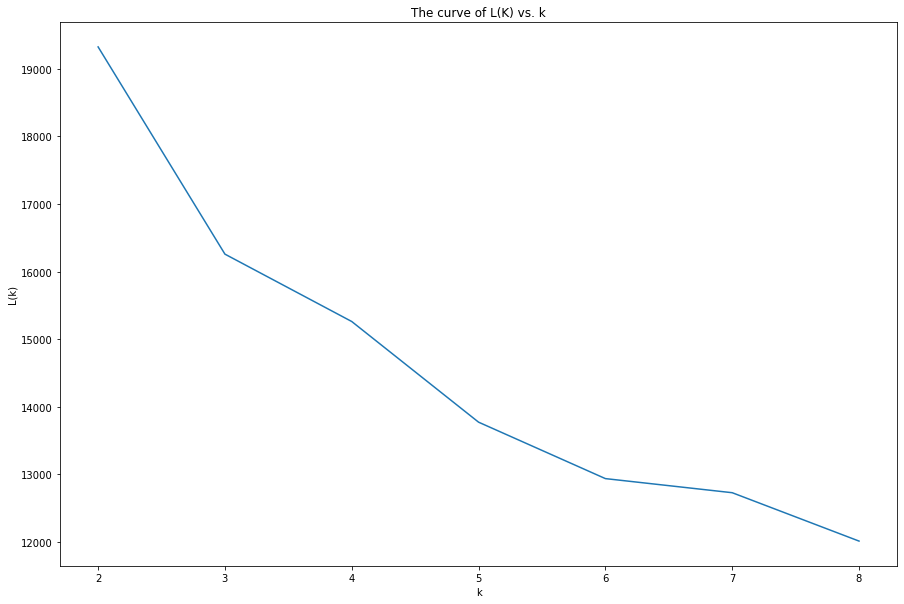

In [8]:
print("The clustering process begins!")

for i in range(len(k)):
    
    k_means(k[i],data_matrix)
    
print("The clustering process ends!\nThe relation between L(k) and k is shown as following:")
plt_loss_k(k,loss_vector)